In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph_and_mst(graph, MST, algo=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
    G = nx.Graph()
    mst = nx.Graph()

    for node in list(graph.keys()):
        for to_node, cost in graph[node].items():
            G.add_edge(node, to_node, weight=cost)
    
    for edge in MST:
        mst.add_edge(edge[0], edge[1], weight = edge[2])
    
    pos = nx.spring_layout(G, k=0.5, iterations=50, scale=0.1)

    #Draw the original Graph
    nx.draw(G, pos, ax = ax1, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=14, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, ax=ax1, alpha=0.3, edge_labels={(u, v): d['weight'] for (u,v,d) in G.edges(data=True)}, font_size=18)
    ax1.set_title("Original Graph", fontsize=20)
    ax1.axis('off')

    nx.draw(mst, pos, ax=ax2, with_labels=True, node_color='lightgreen', 
            node_size=500, font_size=14, font_weight='light')
    nx.draw_networkx_edge_labels(mst, pos, ax=ax2, alpha=0.3, 
                                 edge_labels={(u,v): d['weight'] for (u,v,d) in mst.edges(data=True)},
                                 font_size=18)
    ax2.set_title(f"Minimum Spanning Tree ({algo})", fontsize=20)
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

In [2]:
#Prim's Algorithm (Priority Queue Method)
import heapq

def Prim(graph) -> object:
    if not graph.keys():
        return "Empty Graph"
    start_node = list(graph.keys())[0]
    total_nodes = len(graph.keys())
    mst = []
    visited = set([start_node])
    edges = [(cost, start_node, end_node) for end_node, cost in graph[start_node].items()]
    heapq.heapify(edges)
    while edges:
        cost, start_node, end_node = heapq.heappop(edges)
        if end_node not in visited:
            visited.add(end_node)
            mst.append((start_node, end_node, cost))
        for next_end_node, next_node_cost in graph[end_node].items():
            if next_end_node not in visited:
                heapq.heappush(edges, (next_node_cost, end_node, next_end_node))
        
    return mst

graph = {
    'A': {'B': 2, 'C': 3},
    'B': {'A': 2, 'C': 1, 'D': 1},
    'C': {'A': 3, 'B': 1, 'D': 4},
    'D': {'B': 1, 'C': 4}
}

In [3]:
#class Disjoint-Set

class Disjoint_Set:
    def __init__(self, vertices):
        self.parent = {v:v for v in vertices}
        self.rank = {v:0 for v in vertices}
    
    def find(self, node):
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]
    
    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)

        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1

In [4]:
#Kruskal Algorithm (Union Disjoint Set Method)
def kruskal(graph: dict):
    if not len(graph.keys()):
        return None
    mst = []
    vertices = list(graph.keys())
    edges = [(weight, u, v) for u in graph.keys() for v, weight in graph[u].items()]
    edges.sort()
    d_set = Disjoint_Set(vertices)
    n = 0
    total_nodes = len(vertices)
    for edge in edges:
        weight, u, v = edge[0], edge[1], edge[2]
        if d_set.find(u) != d_set.find(v):
            d_set.union(u, v)
            mst.append((u, v, weight))
            n += 1
        if n == total_nodes - 1:
            break
    
    return mst

graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2, 'F': 6},
    'E': {'C': 10, 'D': 2, 'F': 3},
    'F': {'D': 6, 'E': 3}
}

        

In [5]:
# city_graph = {
#     "New York": {"Boston": 1000, "Philadelphia": 100, "Washington DC": 225},
#     "Boston": {"New York": 1000, "Portland": 314},
#     "Philadelphia": {"New York": 100, "Pittsburgh": 305},
#     "Washington DC": {"New York": 225, "Richmond": 110},
#     "Portland": {"Boston": 314, "Burlington": 216},
#     "Pittsburgh": {"Philadelphia": 305, "Cleveland": 133},
#     "Richmond": {"Washington DC": 110, "Charlotte": 291},
#     "Burlington": {"Portland": 216, "Montreal": 96},
#     "Cleveland": {"Pittsburgh": 133, "Detroit": 169},
#     "Charlotte": {"Richmond": 291, "Atlanta": 245},
#     "Montreal": {"Burlington": 96, "Quebec City": 233},
#     "Detroit": {"Cleveland": 169, "Chicago": 283},
#     "Atlanta": {"Charlotte": 245, "Miami": 662},
#     "Quebec City": {"Montreal": 233, "Toronto": 233},
#     "Chicago": {"Detroit": 283, "Milwaukee": 92},
#     "Miami": {"Atlanta": 662, "New Orleans": 669},
#     "Toronto": {"Quebec City": 233, "Ottawa": 450},
#     "Milwaukee": {"Chicago": 92, "Minneapolis": 337},
#     "New Orleans": {"Miami": 669, "Houston": 348},
#     "Ottawa": {"Toronto": 450, "Kingston": 175},
#     "Minneapolis": {"Milwaukee": 337, "Fargo": 235},
#     "Houston": {"New Orleans": 348, "Dallas": 239},
#     "Kingston": {"Ottawa": 175, "Buffalo": 287},
#     "Fargo": {"Minneapolis": 235, "Bismarck": 196},
#     "Dallas": {"Houston": 239, "Austin": 195},
#     "Buffalo": {"Kingston": 287, "Syracuse": 151},
#     "Bismarck": {"Fargo": 196, "Billings": 542},
#     "Austin": {"Dallas": 195, "San Antonio": 80},
#     "Syracuse": {"Buffalo": 151, "Albany": 148},
#     "Billings": {"Bismarck": 542, "Boise": 547},
#     "San Antonio": {"Austin": 80, "El Paso": 572},
#     "Albany": {"Syracuse": 148, "Hartford": 145},
#     "Boise": {"Billings": 547, "Salt Lake City": 340},
#     "El Paso": {"San Antonio": 572, "Phoenix": 425},
#     "Hartford": {"Albany": 145, "Providence": 182},
#     "Salt Lake City": {"Boise": 340, "Las Vegas": 435},
#     "Phoenix": {"El Paso": 425, "Los Angeles": 373},
#     "Providence": {"Hartford": 182},
#     "Las Vegas": {"Salt Lake City": 435, "San Francisco": 383},
#     "Los Angeles": {"Phoenix": 373, "San Diego": 120},
#     "San Francisco": {"Las Vegas": 383, "Portland OR": 635},
#     "San Diego": {"Los Angeles": 120, "Tijuana": 20},
#     "Portland OR": {"San Francisco": 635, "Seattle": 173},
#     "Tijuana": {"San Diego": 20, "Mexicali": 179},
#     "Seattle": {"Portland OR": 173, "Vancouver": 229},
#     "Mexicali": {"Tijuana": 179, "Hermosillo": 688},
#     "Vancouver": {"Seattle": 229, "Victoria": 70},
#     "Hermosillo": {"Mexicali": 688},
#     "Victoria": {"Vancouver": 70}
# }

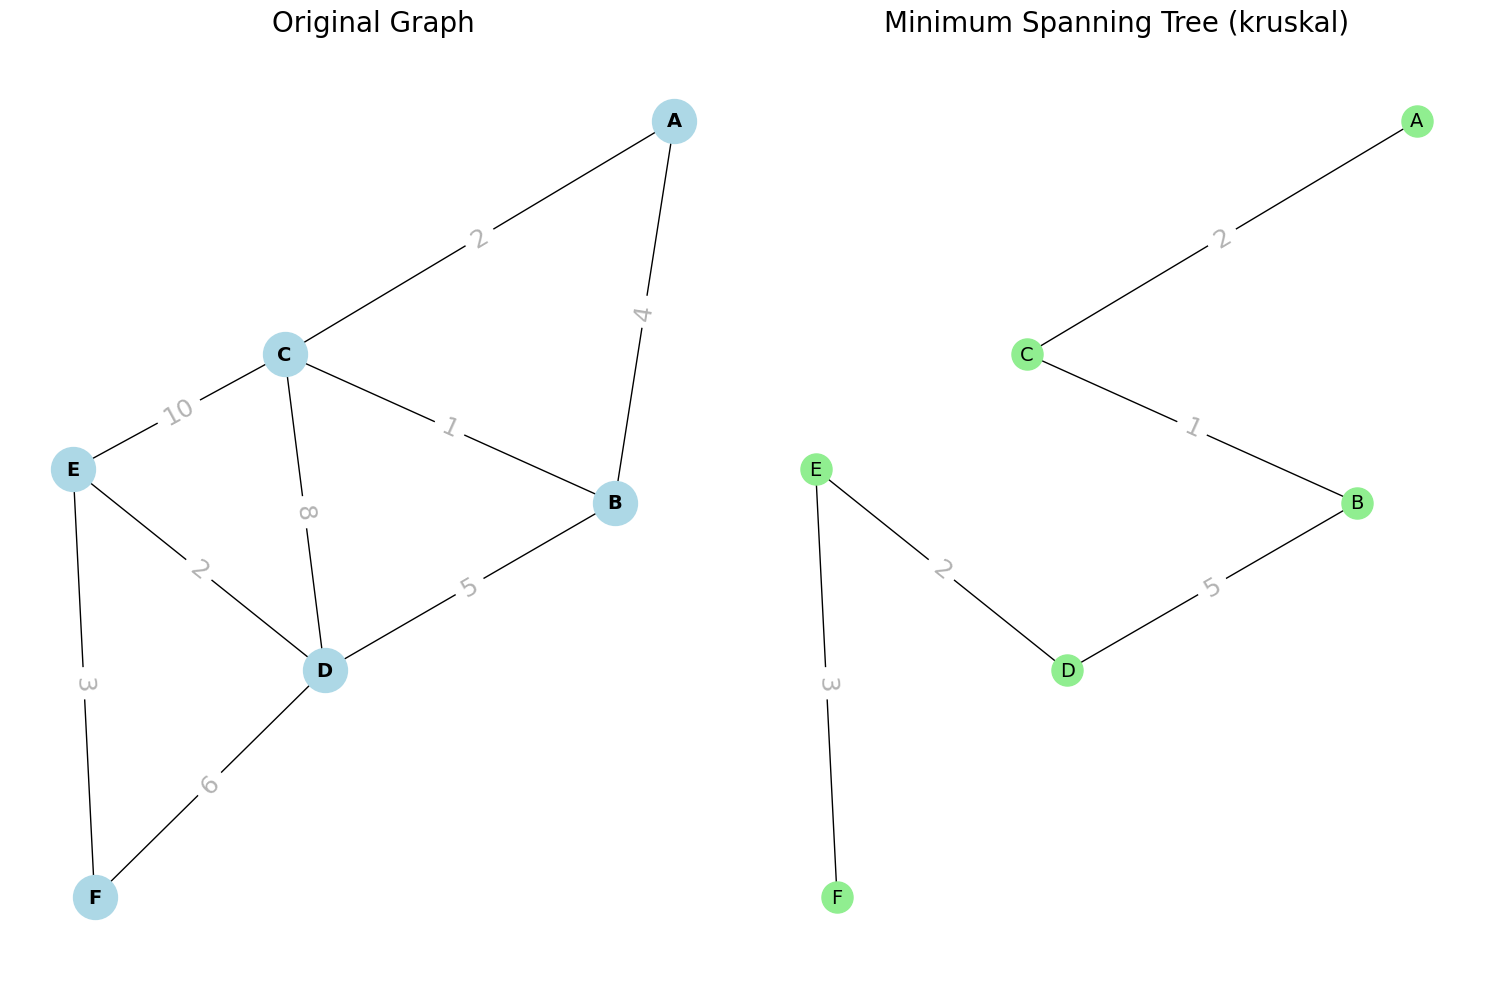

In [6]:
visualize_graph_and_mst(graph, kruskal(graph), algo = kruskal.__name__)
#TODO
#make the visualization better for big graphs



``` mermaid                             
graph TD
    A[New York] --- B[Boston]
    A --- C[Philadelphia]
    A --- D[Washington DC]
    B --- E[Portland]
    C --- F[Pittsburgh]
    D --- G[Richmond]
    E --- H[Burlington]
    F --- I[Cleveland]
    G --- J[Charlotte]
    H --- K[Montreal]
    I --- L[Detroit]
    J --- M[Atlanta]
    K --- N[Quebec City]
    L --- O[Chicago]
    M --- P[Miami]
    N --- Q[Toronto]
    O --- R[Milwaukee]
    P --- S[New Orleans]
    Q --- T[Ottawa]
    R --- U[Minneapolis]
    S --- V[Houston]
    T --- W[Kingston]
    U --- X[Fargo]
    V --- Y[Dallas]
    W --- Z[Buffalo]
    X --- AA[Bismarck]
    Y --- AB[Austin]
    Z --- AC[Syracuse]
    AA --- AD[Billings]
    AB --- AE[San Antonio]
    AC --- AF[Albany]
    AD --- AG[Boise]
    AE --- AH[El Paso]
    AF --- AI[Hartford]
    AG --- AJ[Salt Lake City]
    AH --- AK[Phoenix]
    AI --- AJ[Providence]
    AJ --- AL[Las Vegas]
    AK --- AM[Los Angeles]
    AL --- AN[San Francisco]
    AM --- AO[San Diego]
    AN --- AP[Portland OR]
    AO --- AQ[Tijuana]
    AP --- AR[Seattle]
    AQ --- AS[Mexicali]
    AR --- AT[Vancouver]
    AS --- AU[Hermosillo]
    AT --- AV[Victoria]
    
    A --1000--- B
    A --100--- C
    A --225--- D
    B --314--- E
    C --305--- F
    D --110--- G
    E --216--- H
    F --133--- I
    G --291--- J
    H --96--- K
    I --169--- L
    J --245--- M
    K --233--- N
    L --283--- O
    M --662--- P
    N --233--- Q
    O --92--- R
    P --669--- S
    Q --450--- T
    R --337--- U
    S --348--- V
    T --175--- W
    U --235--- X
    V --239--- Y
    W --287--- Z
    X --196--- AA
    Y --195--- AB
    Z --151--- AC
    AA --542--- AD
    AB --80--- AE
    AC --148--- AF
    AD --547--- AG
    AE --572--- AH
    AF --145--- AI
    AG --340--- AJ
    AH --425--- AK
    AI --182--- AJ
    AJ --435--- AL
    AK --373--- AM
    AL --383--- AN
    AM --120--- AO
    AN --635--- AP
    AO --20--- AQ
    AP --173--- AR
    AQ --179--- AS
    AR --229--- AT
    AS --688--- AU
    AT --70--- AV
```

In [16]:
import heapq

# Helper function to find MST of a subgraph using Prim's algorithm
def prim_mst(graph, start_node):
    mst = []
    visited = set([start_node])
    edges = [(cost, start_node, end_node) for end_node, cost in graph[start_node].items()]
    heapq.heapify(edges)

    while edges:
        cost, start_node, end_node = heapq.heappop(edges)
        if end_node not in visited:
            visited.add(end_node)
            mst.append((start_node, end_node, cost))
            for next_end_node, next_node_cost in graph[end_node].items():
                if next_end_node not in visited:
                    heapq.heappush(edges, (next_node_cost, end_node, next_end_node))

    return mst

# Function to divide the graph into two sets and apply the divide-and-conquer algorithm
def divide_and_conquer_mst(graph):
    # Divide the graph into two parts
    nodes = list(graph.keys())
    half = len(nodes) // 2
    S = nodes[:half]
    V_minus_S = nodes[half:]

    # Create subgraphs for S and V-S
    subgraph_S = {node: {neighbor: graph[node][neighbor] for neighbor in graph[node] if neighbor in S} for node in S}
    subgraph_V_minus_S = {node: {neighbor: graph[node][neighbor] for neighbor in graph[node] if neighbor in V_minus_S} for node in V_minus_S}

    # Find MST for both subgraphs using Prim's algorithm
    mst_S = prim_mst(subgraph_S, S[0])
    mst_V_minus_S = prim_mst(subgraph_V_minus_S, V_minus_S[0])

    # Find the minimum weight edge between S and V-S
    min_edge = None
    min_cost = float('inf')

    for node in S:
        for neighbor in graph[node]:
            if neighbor in V_minus_S:
                if graph[node][neighbor] < min_cost:
                    min_cost = graph[node][neighbor]
                    min_edge = (node, neighbor, min_cost)

    # Combine MSTs and the minimum edge between S and V-S
    mst = mst_S + mst_V_minus_S
    if min_edge:
        mst.append(min_edge)

    return mst

# Example graph
graph = {
    'A': {'B': 3},
    'B': {'C': 2, 'E': 2},
    'C': {'D':1},
    'D': {'G':3},
    'E': {'F':5},
    'F': {'G':7}
}

# Visualize both the original graph and the MST
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, title="Graph"):
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, cost in edges.items():
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, font_weight='bold')
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

def visualize_mst(mst, title="Minimum Spanning Tree"):
    G = nx.Graph()
    for u, v, weight in mst:
        G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(3, 3))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=10, font_weight='bold')
    edge_labels = {(u, v): weight for u, v, weight in mst}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()
    
# Run the divide-and-conquer MST algorithm
mst_divide_and_conquer = divide_and_conquer_mst(graph)

# Run Prim's MST algorithm on the full graph, starting from node 'A' (or any node of your choice)
prim_mst_graph = prim_mst(graph, 'A')  # Provide a starting node, e.g., 'A'

# Print the resulting MST
print("Divide and Conquer MST:", mst_divide_and_conquer)
print("Prim's MST:", prim_mst_graph)

# Visualize the original graph
visualize_graph(graph, "Original Graph")

# Visualize the MST from the divide-and-conquer algorithm
visualize_mst(mst_divide_and_conquer, "Divide and Conquer MST")

# Visualize the MST from Prim's algorithm
visualize_mst(prim_mst_graph, "Prim MST")



KeyError: 'G'

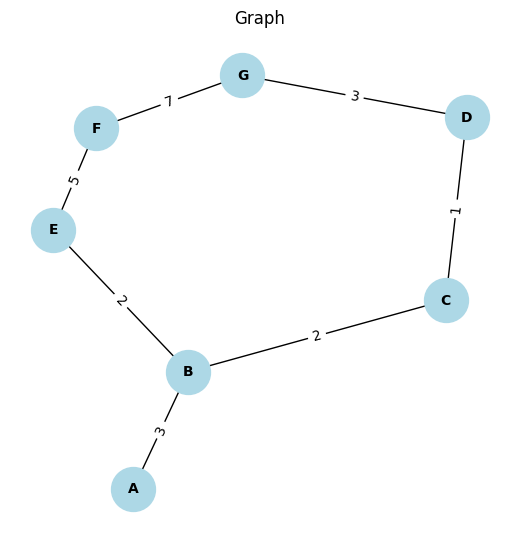

In [17]:
graph = {
    'A': {'B': 3},
    'B': {'C': 2, 'E': 2},
    'C': {'D':1},
    'D': {'G':3},
    'E': {'F':5},
    'F': {'G':7}
}

visualize_graph(graph)